## In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

### President Franklin D. Roosevelt in 1941
### President John F. Kennedy in 1961
### President Richard Nixon in 1973

In [97]:
import nltk
import re
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
speech1 = inaugural.raw('1941-Roosevelt.txt')
speech2 = inaugural.raw('1961-Kennedy.txt')
speech3 = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\nlokesh\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


## Finding the number of characters, words and sentences for the mentioned documents.

In [98]:
y = pd.DataFrame({'Title':['Franklin','John','Richard'], 'Speeches': [speech1, speech2, speech3]})

In [99]:
y

,Title,Speeches
0,Franklin,On each national day of inauguration since 178...
1,John,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Richard,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [100]:
## Character count:
y['char_count'] = y['Speeches'].str.len()
## Word count:
y['word_count'] = y['Speeches'].apply(lambda x: len(str(x).split()))
## Sentence count:
y['sentence_count'] = y['Speeches'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))

In [101]:
y

,Title,Speeches,char_count,word_count,sentence_count
0,Franklin,On each national day of inauguration since 178...,7571,1360,67
1,John,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1390,52
2,Richard,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1819,68


## Removing all the stopwords from all the three speeches.

In [102]:
## having all the characters in lower case
y['Processed_Speeches'] = y['Speeches'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [105]:
## removing special characters
y['Processed_Speeches'] = y['Processed_Speeches'].str.replace('[^a-zA-Z\s\w]','')

In [106]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nlokesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [108]:
y['stopwords_before'] = y['Processed_Speeches'].apply(lambda x: len([x for x in x.split() if x in stop]))
y

,Title,Speeches,char_count,word_count,sentence_count,Processed_Speeches,stopwords_before
0,Franklin,On each national day of inauguration since 178...,7571,1360,67,on each national day of inauguration since 178...,711
1,John,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1390,52,vice president johnson mr speaker mr chief jus...,672
2,Richard,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1819,68,mr vice president mr speaker mr chief justice ...,969


In [109]:
y['Processed_Speeches'] = y['Processed_Speeches'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
y['stopwords_after'] = y['Processed_Speeches'].apply(lambda x: len([x for x in x.split() if x in stop]))
y

,Title,Speeches,char_count,word_count,sentence_count,Processed_Speeches,stopwords_before,stopwords_after
0,Franklin,On each national day of inauguration since 178...,7571,1360,67,national day inauguration since 1789 people re...,711,0
1,John,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1390,52,vice president johnson mr speaker mr chief jus...,672,0
2,Richard,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1819,68,mr vice president mr speaker mr chief justice ...,969,0


## Checking which word occurs the most number of times in his inaugural address for each president. Checking for the top three words.

In [110]:
franklin = y[y['Title']=='Franklin']['Processed_Speeches']
franklin

0    national day inauguration since 1789 people re...
Name: Processed_Speeches, dtype: object

In [111]:
john = y[y['Title']=='John']['Processed_Speeches']
john

1    vice president johnson mr speaker mr chief jus...
Name: Processed_Speeches, dtype: object

In [112]:
richard = y[y['Title']=='Richard']['Processed_Speeches']
richard

2    mr vice president mr speaker mr chief justice ...
Name: Processed_Speeches, dtype: object

In [113]:
frequency_franklin = pd.Series(' '.join(franklin).split()).value_counts()
frequency_franklin.head()

nation       11
know         10
spirit        9
democracy     9
life          8
dtype: int64

In [114]:
frequency_john = pd.Series(' '.join(john).split()).value_counts()
frequency_john.head()

let       16
us        12
sides      8
world      8
pledge     7
dtype: int64

In [115]:
frequency_richard = pd.Series(' '.join(richard).split()).value_counts()
frequency_richard.head()

us       26
let      22
peace    19
world    16
new      15
dtype: int64

## Plotting the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [125]:
! pip install wordcloud

In [127]:
from wordcloud import WordCloud,STOPWORDS

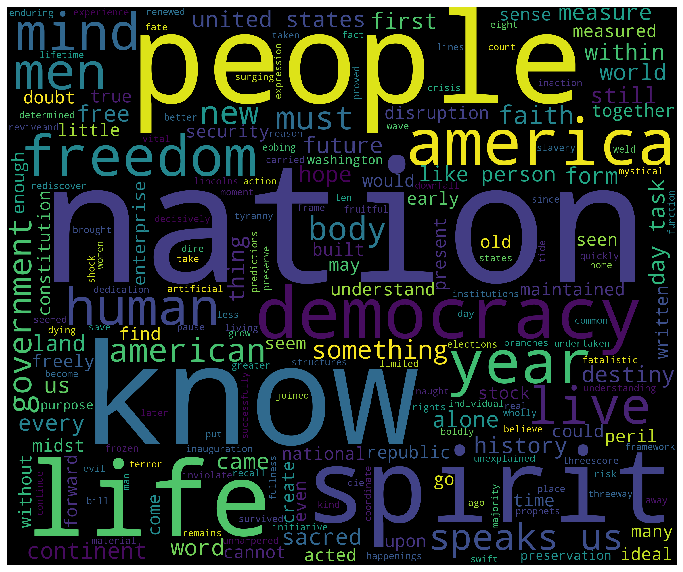

In [129]:
words_franklin = ' '.join(franklin)
wordcloud_franklin = WordCloud(stopwords=stop,
                      width=3000,
                      height=2500
                     ).generate(words_franklin)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_franklin)
plt.axis('off')
plt.show()

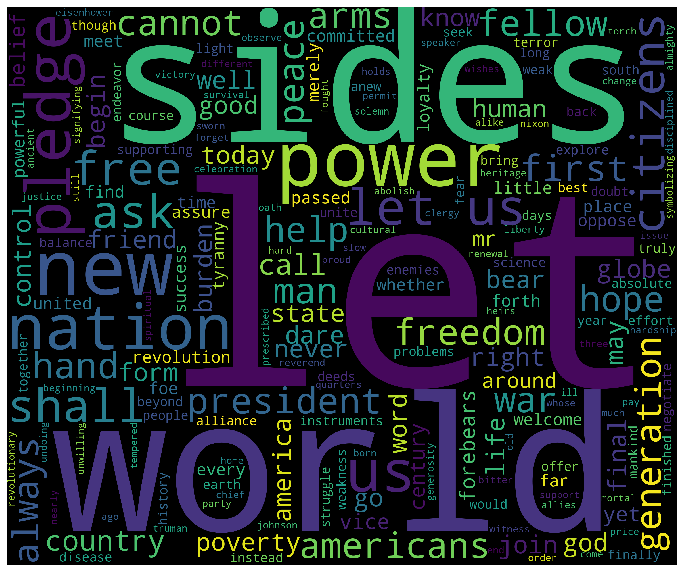

In [130]:
words_john = ' '.join(john)
wordcloud_john = WordCloud(stopwords=stop,
                      width=3000,
                      height=2500
                     ).generate(words_john)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_john)
plt.axis('off')
plt.show()

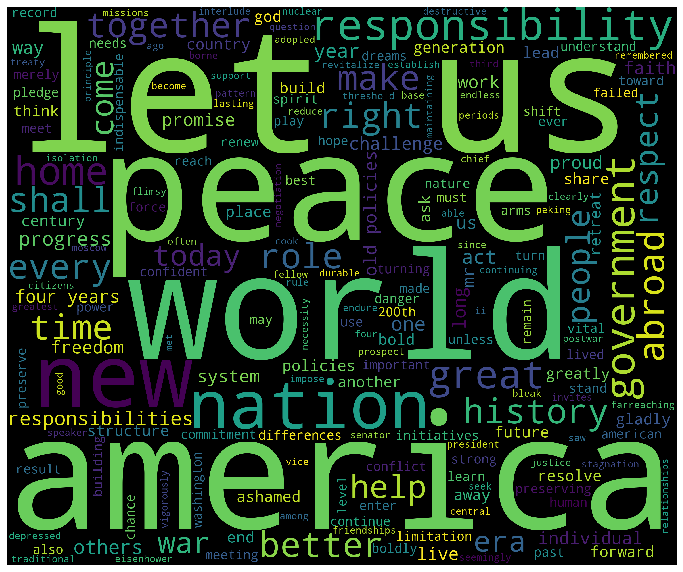

In [131]:
words_richard = ' '.join(richard)
wordcloud_richard = WordCloud(stopwords=stop,
                      width=3000,
                      height=2500
                     ).generate(words_richard)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_richard)
plt.axis('off')
plt.show()